Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

In [119]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset\data.csv')

In [120]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [121]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

## a. Measure the dispersion in both and interpret the results 


In [122]:
# Standard deviation is common way to find the dispersion of data around its mean 
# first step is to find mean of the data 
mean_bp_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_bp_after = df[' Blood Pressure After (mmHg)'].mean()
df1  = pd.DataFrame()
# second step lets find variance sqaure(sigma)
df1['x-mean_bp_before'] = (df[' Blood Pressure Before (mmHg)'] - mean_bp_before) ** 2
df1['x-mean_bp_after'] = (df[' Blood Pressure After (mmHg)'] - mean_bp_after) ** 2

summation_bp_before = df1['x-mean_bp_before'].sum()
summation_bp_after = df1['x-mean_bp_after'].sum()

std_bp_before = np.sqrt(summation_bp_before / df.shape[0])
std_bp_after = np.sqrt(summation_bp_after / df.shape[0])
print(f'Measure of dispersion in standard deviation of column Bloos Pressure Before is {std_bp_before}')
print(f'Measure of dispersion in standard deviation of column Bloos Pressure After is {std_bp_after}')

Measure of dispersion in standard deviation of column Bloos Pressure Before is 6.56520372875054
Measure of dispersion in standard deviation of column Bloos Pressure After is 6.853495458523336


In [123]:
#using numpy 
print(np.std(df[' Blood Pressure Before (mmHg)']), np.std(df[' Blood Pressure After (mmHg)']))

6.56520372875054 6.853495458523336


## b. Calculate mean and 5% confidence interval and plot it in a graph

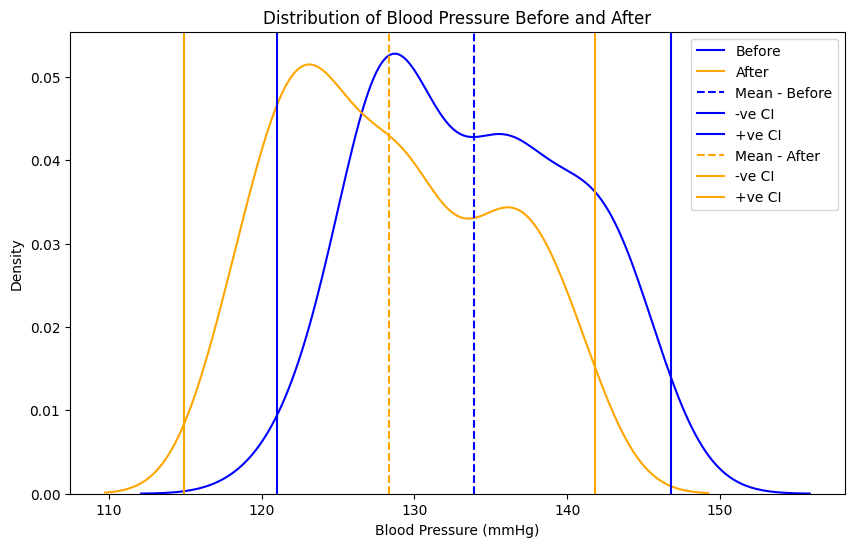

In [124]:

# Plot the means and confidence intervals
confidence_interval_before = stats.norm.interval(0.95,  loc=mean_bp_before, scale=std_bp_before)
confidence_interval_after = stats.norm.interval(0.95,  loc=mean_bp_after, scale=std_bp_after)

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[' Blood Pressure Before (mmHg)'], color='blue', label='Before')
sns.kdeplot(data=df[' Blood Pressure After (mmHg)'], color='orange', label='After')

# Plot mean and confidence interval
plt.axvline(bp_before_mean, color='blue', linestyle='--', label='Mean - Before')
plt.axvline(confidence_interval_before[0], color='blue', label='-ve CI')
plt.axvline(confidence_interval_before[1], color='blue', label='+ve CI')

plt.axvline(bp_after_mean, color='orange', linestyle='--', label='Mean - After')
plt.axvline(confidence_interval_after[0], color='orange', label='-ve CI')
plt.axvline(confidence_interval_after[1], color='orange', label='+ve CI')

# Set labels and title
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Density')
plt.title('Distribution of Blood Pressure Before and After')

# Add legend
plt.legend()

# Show the plot
plt.show()


## c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.


In [125]:
# Mean absolute deviation 
# MAD  = summation |X - mean_bp_before| / N 
MAD_before = sum(abs(df[' Blood Pressure Before (mmHg)']  - mean_bp_before))/ len(df)
MAD_after = sum(abs(df[' Blood Pressure After (mmHg)']  - mean_bp_after))/ len(df)
print(f'Mean Absolute Deviation Before is {MAD_before}')
print(f'Mean Absolute Deviation After is {MAD_after}')
print(f'Standard Deviation Before is {std_bp_before}')
print(f'Standard Deviation After is {std_bp_after}')
## Interpret Result
print(f'MAD present measure of average variability in dataset, higher the MAD value , high variable data points are')
print(f'Standard Deviation is unit for measure of dispersion')



Mean Absolute Deviation Before is 5.7118
Mean Absolute Deviation After is 5.9
Standard Deviation Before is 6.56520372875054
Standard Deviation After is 6.853495458523336
MAD present measure of average variability in dataset, higher the MAD value , high variable data points are
Standard Deviation is unit for measure of dispersion


## d. Calculate the correlation coefficient and check the significance of it at 1% level of significance

In [126]:
df[[' Blood Pressure Before (mmHg)' , ' Blood Pressure After (mmHg)']].corr()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Blood Pressure Before (mmHg),1.000000,0.977949
Blood Pressure After (mmHg),0.977949,1.000000


In [127]:
ci_before = stats.norm.interval(0.99 , loc = mean_bp_before , scale = std_bp_before)
ci_after = stats.norm.interval(0.99 , loc = mean_bp_after , scale = std_bp_after)
print(f'Significance values for column BP before at 99 percent ci are {ci_before}')
print(f'Significance values for column BP after at 99 percent ci are {ci_after}')

Significance values for column BP before at 99 percent ci are (116.99915585171584, 150.82084414828415)
Significance values for column BP after at 99 percent ci are (110.7065655661963, 146.01343443380372)
